In [1]:
import pandas as pd

In [2]:
data_frame=pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
data_frame.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
# Data Preprocessing
# Step 1: Handle Missing Values
# Check for missing values
missing_values = data_frame.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:\n", missing_values)

# Handle missing values (example: imputation)
data_frame.dropna(inplace=True)  # Remove rows with missing values

# Confirm no missing values after handling
print("After handling missing values:\n", data_frame.isnull().sum())


Missing Values:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
After handling missing values:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [7]:
# Step2: Feature Scaling (Standardization for numerical features)
from sklearn.discriminant_analysis import StandardScaler


numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
scaler = StandardScaler()
data_frame[numerical_cols] = scaler.fit_transform(data_frame[numerical_cols])

In [9]:
data_frame.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,2.472682,3,Presence
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,-0.711535,7,Absence
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,-0.711535,7,Presence
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,0.349871,7,Absence
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,0.349871,3,Absence


In [10]:
#Step3:Feature Selection (SelectKBest for feature selection)
from sklearn.feature_selection import SelectKBest, f_classif

X = data_frame.drop('Heart Disease', axis=1)
y = data_frame['Heart Disease']

selector = SelectKBest(score_func=f_classif, k=5)
selected_features = selector.fit_transform(X, y)
selected_feature_names = X.columns[selector.get_support()]

In [11]:
selected_features

array([[-1.75920811,  0.        ,  1.18101235,  2.47268219,  3.        ],
       [ 0.44640927,  0.        ,  0.48115318, -0.71153494,  7.        ],
       [-0.37529132,  0.        , -0.65611797, -0.71153494,  7.        ],
       ...,
       [ 0.14367747,  0.        ,  0.21870599, -0.71153494,  3.        ],
       [-0.07255953,  0.        , -0.56863558, -0.71153494,  6.        ],
       [-1.80245551,  1.        ,  0.39367078,  2.47268219,  3.        ]])

In [15]:
# Step4:Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[selected_feature_names], y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium
115,0.532904,0,-0.918565,-0.711535,3
33,-0.418539,1,2.055836,-0.711535,7
184,1.008625,0,-0.918565,2.472682,3
142,0.576151,0,-0.393671,0.349871,7
197,0.359914,0,0.481153,-0.711535,3


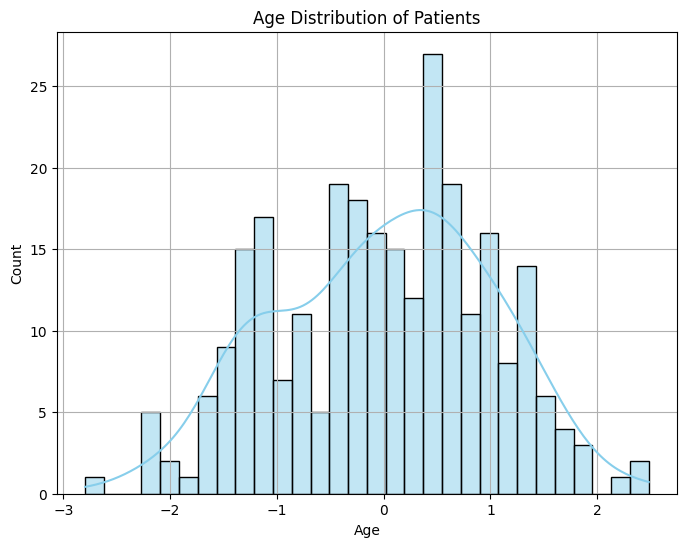

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1: Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_frame['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

C:\Users\legit\AppData\Local\Temp\ipykernel_1432\317836720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data_frame, palette='pastel')


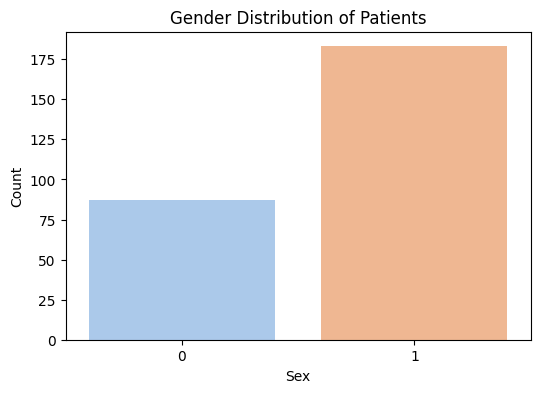

In [17]:
# Example 2: Gender Distribution (Count Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data_frame, palette='pastel')
plt.title('Gender Distribution of Patients')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

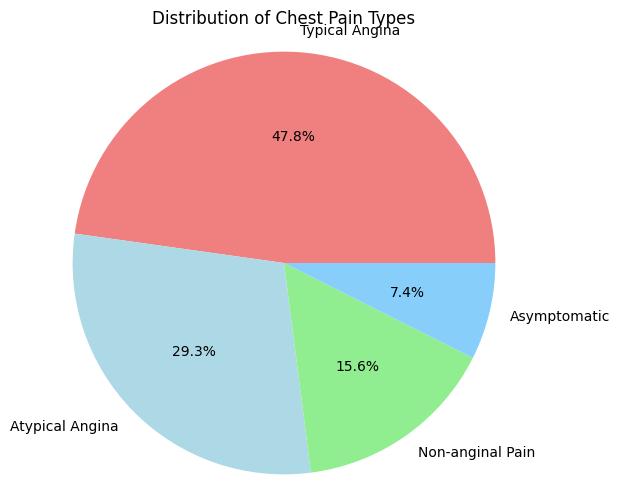

In [18]:
# Example 3: Chest Pain Types (Pie Chart)
plt.figure(figsize=(6, 6))
labels = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']
sizes = data_frame['Chest pain type'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue'])
plt.title('Distribution of Chest Pain Types')
plt.axis('equal')
plt.show()

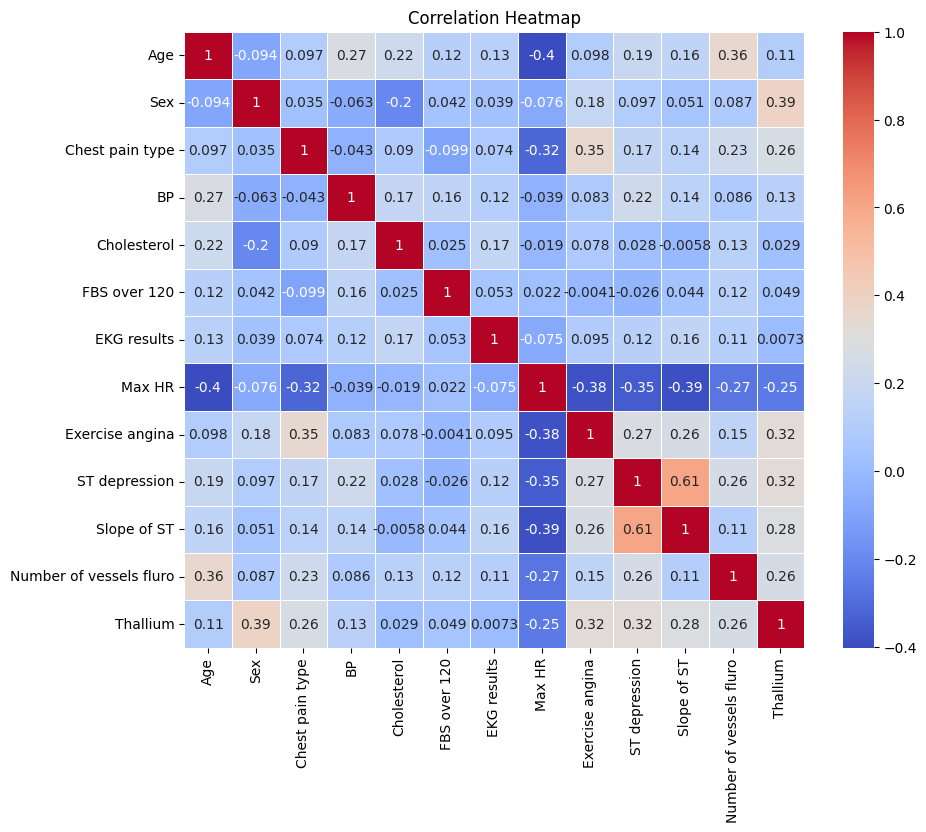

In [22]:
# Example 4: Correlation Heatmap
numeric_data = data_frame.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\legit\AppData\Local\Temp\ipykernel_1432\1263101103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease', y='Max HR', data=data_frame, palette='Set3')


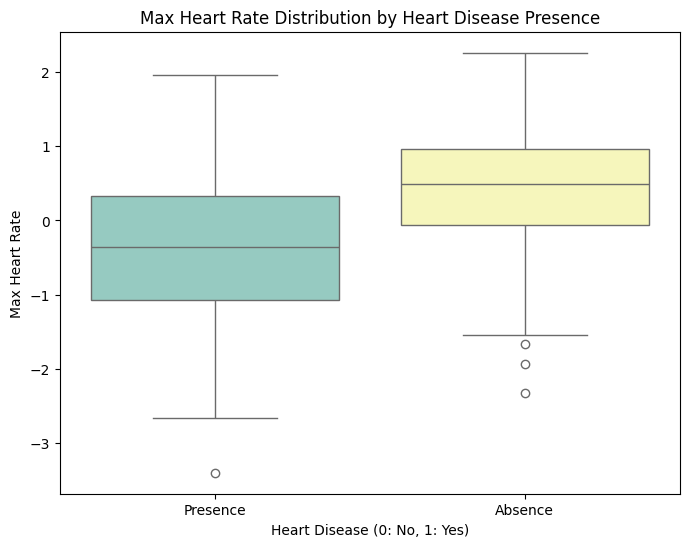

In [20]:
# Example 5: Box Plot for Max HR vs. Heart Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Disease', y='Max HR', data=data_frame, palette='Set3')
plt.title('Max Heart Rate Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Max Heart Rate')
plt.show()

In [37]:
# Pipeline for preprocessing (scaling) and model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Pipeline for preprocessing (scaling) and model fitting
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('clf_lr', LogisticRegression())])

# Define parameter grids for hyperparameter tuning
param_grid_lr = {'clf_lr__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV for hyperparameter tuning
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, verbose=1, n_jobs=-1)

# Fit the models
grid_lr.fit(X_train, y_train)


# Print best parameters and evaluate models
print("Logistic Regression - Best Parameters:", grid_lr.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression - Best Parameters: {'clf_lr__C': 1}


In [38]:
# Pipeline for preprocessing (scaling) and model fitting
from sklearn.ensemble import RandomForestClassifier


pipeline_rf = Pipeline([('scaler', StandardScaler()), ('clf_rf', RandomForestClassifier())])

# Define parameter grids for hyperparameter tuning
param_grid_rf = {'clf_rf__n_estimators': [100, 200, 300],
                 'clf_rf__max_depth': [None, 10, 20, 30]}

# Perform GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=1, n_jobs=-1)

# Fit the models
grid_rf.fit(X_train, y_train)

# Print best parameters and evaluate models
print("Random Forest - Best Parameters:", grid_rf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest - Best Parameters: {'clf_rf__max_depth': None, 'clf_rf__n_estimators': 300}


In [39]:
# Pipeline for preprocessing (scaling) and model fitting
from sklearn.svm import SVC


pipeline_svm = Pipeline([('scaler', StandardScaler()), ('clf_svm', SVC())])

# Define parameter grids for hyperparameter tuning
param_grid_svm = {'clf_svm__C': [0.1, 1, 10, 100],
                  'clf_svm__gamma': [1, 0.1, 0.01, 0.001]}

# Perform GridSearchCV for hyperparameter tuning
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, verbose=1, n_jobs=-1)

# Fit the models
grid_svm.fit(X_train, y_train)

# Print best parameters and evaluate models
print("Support Vector Machine - Best Parameters:", grid_svm.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Support Vector Machine - Best Parameters: {'clf_svm__C': 1, 'clf_svm__gamma': 0.01}


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate Logistic Regression on test set
y_pred_lr = grid_lr.predict(X_test)
print("----- Logistic Regression -----")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


----- Logistic Regression -----
Confusion Matrix:
 [[31  2]
 [ 3 18]]
Classification Report:
               precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [42]:
# Evaluate Random Forest on test set
y_pred_rf = grid_rf.predict(X_test)
print("----- Random Forest -----")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


----- Random Forest -----
Confusion Matrix:
 [[31  2]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

     Absence       0.84      0.94      0.89        33
    Presence       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



In [43]:
# Evaluate SVM on test set
y_pred_svm = grid_svm.predict(X_test)
print("----- Support Vector Machine -----")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

----- Support Vector Machine -----
Confusion Matrix:
 [[33  0]
 [ 4 17]]
Classification Report:
               precision    recall  f1-score   support

     Absence       0.89      1.00      0.94        33
    Presence       1.00      0.81      0.89        21

    accuracy                           0.93        54
   macro avg       0.95      0.90      0.92        54
weighted avg       0.93      0.93      0.92        54

